In [205]:
import pandas as pd
from nltk.tokenize import word_tokenize
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [206]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
train = train.append(test, ignore_index=True)
train

(7613, 5)


/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_67514/1602267953.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(test, ignore_index=True)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


In [207]:
# Removing twitter handles
def reg(text, pattern):
    reg = re.findall(pattern, text)
    for i in reg:
        text = re.sub(i, "", text)
    
    return text
train['cleaned'] = np.vectorize(reg)(train["text"], "@[\w]*")
train.tail()

,id,keyword,location,text,target,cleaned
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,Storm in RI worse than last hurricane. My city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,Green Line derailment in Chicago http://t.co/U...
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...
10875,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,NaN,#CityofCalgary has activated its Municipal Eme...


In [208]:
train['cleaned'] = train['cleaned'].str.replace("[^a-zA-Z#]", " " )
train.tail()

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_67514/2086108398.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['cleaned'] = train['cleaned'].str.replace("[^a-zA-Z#]", " " )


,id,keyword,location,text,target,cleaned
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,EARTHQUAKE SAFETY LOS ANGELES SAFETY FASTE...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,Storm in RI worse than last hurricane My city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,Green Line derailment in Chicago http t co U...
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,MEG issues Hazardous Weather Outlook HWO htt...
10875,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,NaN,#CityofCalgary has activated its Municipal Eme...


In [209]:
train['cleaned'] = train['cleaned'].str.lower()
train

,id,keyword,location,text,target,cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,all residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,people receive #wildfires evacuation or...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles safety faste...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane my city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http t co u...
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook hwo htt...


In [210]:
train['tokenized'] = train['cleaned'].apply(lambda x: [i for i in x.split()])

train.head()

,id,keyword,location,text,target,cleaned,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, #eart..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,all residents asked to shelter in place are ...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,people receive #wildfires evacuation or...,"[people, receive, #wildfires, evacuation, orde..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, #al..."


In [211]:
from nltk.corpus import stopwords
stop_words =  set(stopwords.words('english'))

In [212]:
train['tokenized'] = train['tokenized'].apply(lambda x: [i for i in x if i not in stop_words])
train['tokenized'] = train['tokenized'].apply(lambda x: [i for i in x if len(i) > 2])
train.head()
train.tail()

,id,keyword,location,text,target,cleaned,tokenized
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles safety faste...,"[earthquake, safety, los, angeles, safety, fas..."
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane my city...,"[storm, worse, last, hurricane, city, amp, oth..."
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http t co u...,"[green, line, derailment, chicago, http, utbxl..."
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook hwo htt...,"[meg, issues, hazardous, weather, outlook, hwo..."
10875,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,NaN,#cityofcalgary has activated its municipal eme...,"[#cityofcalgary, activated, municipal, emergen..."


In [213]:
from nltk.stem.porter import PorterStemmer
porterStemmer = PorterStemmer()
train['stemmed'] = train['tokenized'].apply(lambda x: [porterStemmer.stem(i) for i in x]) 
train.head() 
train.tail()

,id,keyword,location,text,target,cleaned,tokenized,stemmed
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles safety faste...,"[earthquake, safety, los, angeles, safety, fas...","[earthquak, safeti, lo, angel, safeti, fasten,..."
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane my city...,"[storm, worse, last, hurricane, city, amp, oth...","[storm, wors, last, hurrican, citi, amp, other..."
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http t co u...,"[green, line, derailment, chicago, http, utbxl...","[green, line, derail, chicago, http, utbxlcbiuy]"
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook hwo htt...,"[meg, issues, hazardous, weather, outlook, hwo...","[meg, issu, hazard, weather, outlook, hwo, htt..."
10875,10875,NaN,NaN,#CityofCalgary has activated its Municipal Eme...,NaN,#cityofcalgary has activated its municipal eme...,"[#cityofcalgary, activated, municipal, emergen...","[#cityofcalgari, activ, municip, emerg, plan, ..."


In [214]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
train['lemmatized'] = train['tokenized'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

train['stemmed'] = train['stemmed'].apply(lambda x: ' '.join(i for i in x))
train['lemmatized'] = train['lemmatized'].apply(lambda x: ' '.join(i for i in x))
train

,id,keyword,location,text,target,cleaned,tokenized,stemmed,lemmatized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0,our deeds are the reason of this #earthquake m...,"[deeds, reason, #earthquake, may, allah, forgive]",deed reason #earthquak may allah forgiv,deed reason #earthquake may allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0,forest fire near la ronge sask canada,"[forest, fire, near, ronge, sask, canada]",forest fire near rong sask canada,forest fire near ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0,all residents asked to shelter in place are ...,"[residents, asked, shelter, place, notified, o...",resid ask shelter place notifi offic evacu she...,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0,people receive #wildfires evacuation or...,"[people, receive, #wildfires, evacuation, orde...",peopl receiv #wildfir evacu order california,people receive #wildfires evacuation order cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0,just got sent this photo from ruby #alaska as ...,"[got, sent, photo, ruby, #alaska, smoke, #wild...",got sent photo rubi #alaska smoke #wildfir pou...,got sent photo ruby #alaska smoke #wildfires p...
...,...,...,...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN,earthquake safety los angeles safety faste...,"[earthquake, safety, los, angeles, safety, fas...",earthquak safeti lo angel safeti fasten xrwn,earthquake safety los angeles safety fastener ...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN,storm in ri worse than last hurricane my city...,"[storm, worse, last, hurricane, city, amp, oth...",storm wors last hurrican citi amp other hardes...,storm worse last hurricane city amp others har...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN,green line derailment in chicago http t co u...,"[green, line, derailment, chicago, http, utbxl...",green line derail chicago http utbxlcbiuy,green line derailment chicago http utbxlcbiuy
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN,meg issues hazardous weather outlook hwo htt...,"[meg, issues, hazardous, weather, outlook, hwo...",meg issu hazard weather outlook hwo http rbqjhn,meg issue hazardous weather outlook hwo http r...


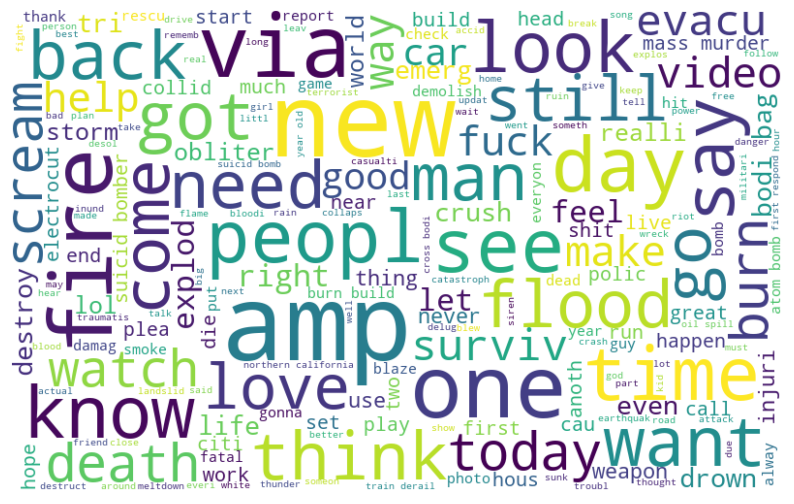

In [215]:
# Visualizing
from wordcloud import WordCloud
#print(type(train))
stemmed = train.iloc[:,7]
#for i in range (len(stemmed)):
    #stemmed[i] = ' '.join(stemmed[i])

#train['s_sentences'] = stemmed

all_words = ' '.join([text for text in train['stemmed']])

wordscloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color = 'white').generate(all_words)
plt.figure(figsize= (10, 7)) 
plt.imshow(wordscloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

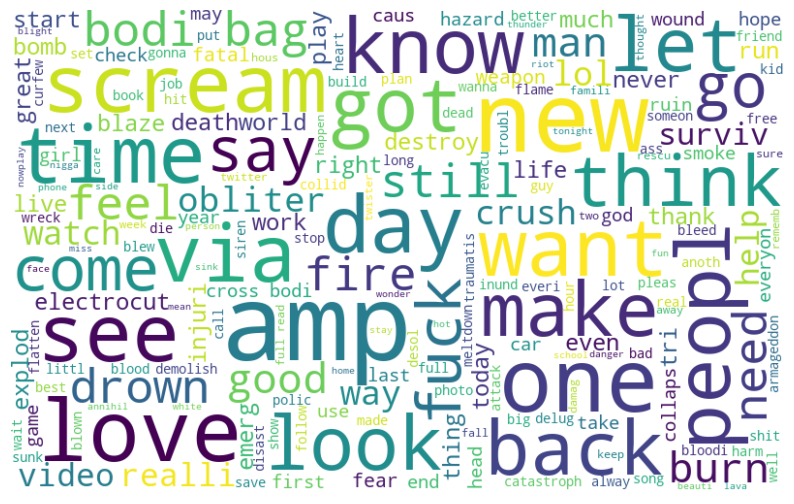

In [216]:
# not disastrous tweet
normal = ' '.join([text for text in train['stemmed'][train['target'] == 0]])
normal_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color = 'white', mode = 'RGBA').generate(normal)

plt.figure(figsize= (10, 7)) 
plt.imshow(normal_cloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

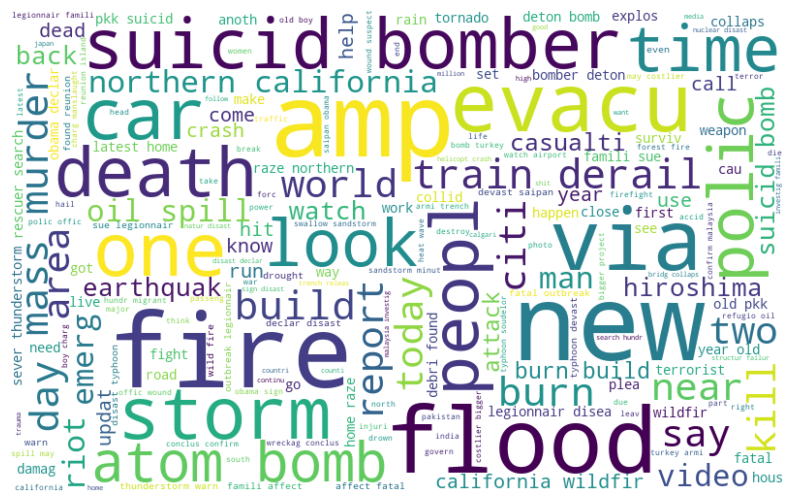

In [217]:
# disastrous tweet
normal = ' '.join([text for text in train['stemmed'][train['target'] == 1]])
disastrous_cloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, background_color = 'white', mode = 'RGBA').generate(normal)

plt.figure(figsize= (10, 7)) 
plt.imshow(disastrous_cloud, interpolation='bilinear') 
plt.axis('off')
plt.show()

In [218]:
from pyparsing import tokenMap
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df = 0.9, min_df= 2, max_features = 1000)
bag_of_word_stemmed = vectorizer.fit_transform(train['stemmed'])
bows_df = pd.DataFrame(bag_of_word_stemmed.todense())
# bag_of_word_lemmed = vectorizer.fit_transform(train['lemmatized'])
# bowl_df = pd.DataFrame(bag_of_word_lemmed.todense())
# bowl_df

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_df = 0.90, min_df = 2, max_features = 1000)
tfidfs_matrix = tfidf.fit_transform(train['stemmed'])
# tfidfl_matrix = tfidf.fit_transform(train['lemmatized'])

tfidfs_df = pd.DataFrame(tfidfs_matrix.todense())
# tfidfl_df = pd.DataFrame(tfidfl_matrix.todense())


In [220]:
train_bows = bag_of_word_stemmed[:7613]
# train_bowl = bag_of_word_lemmed[:7]

# train_bowl.todense()
test_bows = bag_of_word_stemmed[7613:]
train_bows.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]])

In [221]:
train_tfidfs = tfidfs_matrix[:31962]
# train_tfidfl = tfidfl_matrix[:31962]
train_tfidfs.todense()
# train_tfidfl.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
from sklearn.model_selection import train_test_split

x_train_bows, x_valid_bows, y_train_bows, y_valid_bows = train_test_split(train_bows,train[:7613]['target'],test_size=0.2,random_state=2)
# x_train_bowl, x_valid_bowl, y_train_bowl, y_valid_bowl = train_test_split(train_bowl,train['target'],test_size=0.2,random_state=2)

In [223]:
x_train_tfidfs, x_valid_tfidfs, y_train_tfidfs, y_valid_tfidfs = train_test_split(train_tfidfs, train['target'], test_size = 0.2, random_state = 17)
# x_train_tfidfl, x_valid_tfidfl, y_train_tfidfl, y_valid_tfidfl = train_test_split(train_tfidfl, train['target'], test_size = 0.2, random_state= 17)

In [224]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


In [225]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=45,solver='lbfgs')

In [226]:
logreg.fit(x_train_bows, y_train_bows)
prediction_bows = logreg.predict_proba(x_valid_bows)

# logreg.fit(x_train_bowl, y_train_bowl)
# prediction_bowl = logreg.predict_proba(x_valid_bowl)

prediction_bows

array([[0.09164171, 0.90835829],
       [0.88917147, 0.11082853],
       [0.26664874, 0.73335126],
       ...,
       [0.6799563 , 0.3200437 ],
       [0.24287802, 0.75712198],
       [0.87319669, 0.12680331]])

In [227]:
predictions_int = prediction_bows[:,1]>=0.3
predictions_int = predictions_int.astype(np.int)
predictions_int

log_bows = f1_score(y_valid_bows, predictions_int)
log_bows

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_67514/2145269635.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions_int = predictions_int.astype(np.int)


0.7443762781186095

In [228]:
# predictionl_int = prediction_bowl[:,1]>=0.3
# predictionl_int = predictionl_int.astype(np.int)
# predictionl_int

# log_bowl = f1_score(y_valid_bowl, predictionl_int)
# log_bowl

In [229]:
# logreg.fit(x_train_tfidfs, y_train_tfidfs)
# prediction_tfidfs = logreg.predict_proba(x_valid_tfidfs)

# # logreg.fit(x_train_tfidfl, y_train_tfidfl)
# # prediction_tfidfl = logreg.predict_proba(x_valid_tfidfl)

In [230]:
# predictions_int = prediction_tfidfs[:,1]>=0.3
# predictions_int = predictions_int.astype(np.int)
# predictions_int

# log_tfidfs = f1_score(y_valid_tfidfs, predictions_int)
# log_tfidfs

In [231]:
# predictionl_int = prediction_tfidfl[:,1]>=0.3
# predictionl_int = predictionl_int.astype(np.int)
# predictionl_int

# log_tfidfl = f1_score(y_valid_tfidfl, predictionl_int)
# log_tfidfl

In [232]:
from xgboost import XGBClassifier

model_bows = XGBClassifier(random_state=22,learning_rate=0.8)
# model_bowl = XGBClassifier(random_state = 22, learning_rate = 0.8)

In [233]:
model_bows.fit(x_train_bows, y_train_bows)
xgbs = model_bows.predict_proba(x_valid_bows)

# model_bowl.fit(x_train_bowl, y_train_bowl)
# xgbl = model_bowl.predict_proba(x_valid_bowl)

In [234]:
xgbs=xgbs[:,1]>=0.3

xgbs_int=xgbs.astype(np.int)

xgbs_bow=f1_score(y_valid_bows,xgbs_int)

xgbs_bow

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_67514/305948768.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xgbs_int=xgbs.astype(np.int)


0.7434119278779474

In [235]:
# xgbl=xgbl[:,1]>=0.3

# xgbl_int=xgbl.astype(np.int)

# # xgbl_bow=f1_score(y_valid_bowl,xgbl_int)

# xgbl_bow

In [236]:
# model_tfidfs = XGBClassifier(random_state=29,learning_rate=0.7)
# # model_tfidfl = XGBClassifier(random_state=29,learning_rate=0.7)

In [237]:
# model_tfidfs.fit(x_train_tfidfs, y_train_tfidfs)
# xgbs_tfidf = model_tfidfs.predict_proba(x_valid_tfidfs)

In [238]:
# model_tfidfl.fit(x_train_tfidfl, y_train_tfidfl)
# xgbl_tfidf = model_tfidfl.predict_proba(x_valid_tfidfl)

In [239]:
# xgbs_tfidf=xgbs_tfidf[:,1]>=0.3

# xgbs_tfidf_int=xgbs_tfidf.astype(np.int)

# xgbs_tfidf_s =f1_score(y_valid_tfidfs,xgbs_tfidf_int)

# xgbs_tfidf_s

In [240]:
# xgbl_tfidf=xgbl_tfidf[:,1]>=0.3

# xgbl_tfidf_int=xgbl_tfidf.astype(np.int)

# xgbl_tfidf_s =f1_score(y_valid_tfidfl,xgbl_tfidf_int)

# xgbl_tfidf_s

In [241]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [242]:
dct.fit(x_train_bows, y_train_bows)
dct_bows = dct.predict_proba(x_valid_bows)

In [243]:
# dct.fit(x_train_bowl, y_train_bowl)
# dct_bowl = dct.predict_proba(x_valid_bowl)

In [244]:
dct_bows=dct_bows[:,1]>=0.3

dct_int_bows=dct_bows.astype(np.int)

dct_score_bows=f1_score(y_valid_bows,dct_int_bows)

dct_score_bows

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_67514/1561074198.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dct_int_bows=dct_bows.astype(np.int)


0.680119581464873

In [245]:
# dct_bowl=dct_bowl[:,1]>=0.3

# dct_int_bowl=dct_bowl.astype(np.int)

# dct_score_bowl=f1_score(y_valid_bowl,dct_int_bowl)

# dct_score_bowl

In [246]:
# dct.fit(x_train_tfidfs, y_train_tfidfs)
# dct_tfidfs = dct.predict_proba(x_valid_tfidfs)


In [247]:
# dct.fit(x_train_tfidfl, y_train_tfidfl)
# dct_tfidfl = dct.predict_proba(x_valid_tfidfl)

In [248]:
# dct_tfidfs=dct_tfidfs[:,1]>=0.3

# dct_int_tfidfs=dct_tfidfs.astype(np.int)

# dct_score_tfidfs=f1_score(y_valid_tfidfs,dct_int_tfidfs)

# dct_score_tfidfs

In [249]:
# dct_tfidfl= dct_tfidfl[:,1]>=0.3

# dct_int_tfidfl=dct_tfidfl.astype(np.int)

# dct_score_tfidfl=f1_score(y_valid_tfidfl,dct_int_tfidfl)

# dct_score_tfidfl

In [250]:
methods_bow = ['Logistic Regression', 'XGBoost', 'Decision Tree']
stemmed_bowscore = [log_bows, xgbs_bow, dct_score_bows]
# lemmed_bowscore = [log_bowl, xgbl_bow, dct_score_bowl]
df_bow = pd.DataFrame(list(zip(methods_bow, stemmed_bowscore)),
               columns =['Machine model', 'Stemmed text'])
df_bow.set_index('Machine model',inplace=True, drop=True)
df_bow = df_bow.stack().to_frame('F1 score').reset_index()
df_bow.rename(columns={'level_1':'Item'},inplace=True)

df_bow

,Machine model,Item,F1 score
0,Logistic Regression,Stemmed text,0.744376
1,XGBoost,Stemmed text,0.743412
2,Decision Tree,Stemmed text,0.680120


In [251]:
# methods_tfidf = ['Logistic Regression', 'XGBoost', 'Decision Tree']
# stemmed_tfidfscore = [log_tfidfs, xgbs_tfidf_s, dct_score_tfidfs]

# df_tfidf = pd.DataFrame(list(zip(methods_tfidf, stemmed_tfidfscore)),
#                columns =['Machine model', 'Stemmed text'])
# df_tfidf.set_index('Machine model',inplace=True, drop=True)
# df_tfidf = df_tfidf.stack().to_frame('F1 score').reset_index()
# df_tfidf.rename(columns={'level_1':'Item'},inplace=True)
# df_tfidf

(0.6, 0.8)

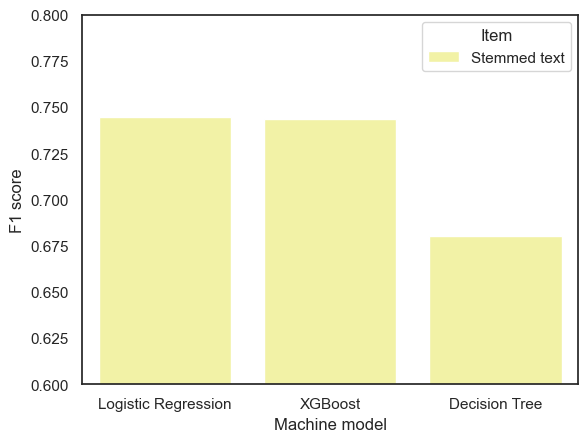

In [252]:
sns.set(style="white")
bow_bar = sns.barplot(x='Machine model', y='F1 score', hue = 'Item', data = df_bow, palette="Accent_r")
bow_bar.set_ylim(0.6, 0.8)

In [253]:
# sns.set(style="white")
# tfidf_bar = sns.barplot(x='Machine model', y='F1 score', hue = 'Item', data = df_tfidf, palette="Accent_r")
# tfidf_bar.set_ylim(0.6, 0.8)

Logistic Regression and XGBoost model perform almost similarly for both lemmatized and stemmed text. We will choose XGBoost with lemmatized text as it did better in bow. 

In [254]:
test_pred = model_bows.predict_proba(test_bows)

test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)

test['target'] = test_pred_int

submission = test[['id','target']]
submission.to_csv('new.csv', index=False)

/var/folders/ly/fm0kkb6x1b91l8mnvhcy7kg00000gn/T/ipykernel_67514/144269903.py:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_pred_int = test_pred_int.astype(np.int)
